In [48]:
%pylab notebook
import soundfile  
import IPython.display as ipd

Populating the interactive namespace from numpy and matplotlib


In [6]:
import scipy.io
def morsetrans(x,K,ga,be,method='bandwidth' ):
    filename='../morse_g{:.2f}_b{:.2f}_{}.mat'.format(ga,be,method)
    W=scipy.io.loadmat(filename)['W']
    assert(K<5)
    W=W[:,:,K]
    #print filename,W.shape,W.dtype,np.sum(W)
    X=np.fft.fft(x)
    #print X.shape,X.dtype ,X.sum()
    #print np.sum(X.reshape([-1,1])*W)
    return np.fft.ifft( X.reshape([-1,1])*W,axis=0).T;

In [24]:
def norm_img(bb,norm):
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    return bb

In [61]:
x,_=soundfile.read(np.random.choice(filenames,1)[0])

ipd.Audio(x,rate=16000)


In [64]:
def run(filename,N=1,gamma=3,beta=1):
    x,_=soundfile.read(filename)
    if len(x)<16000:
        x=np.concatenate([x,np.zeros([16000-len(x)])])
    elif len(x)>16000:
        x=x[:16000]
    assert(len(x)==16000)

    lst=[]
    plt.figure(figsize=(10,2))
    subplt=plt.subplot(1,2,1)
    plot(x);plt.show()
    for K in range(N):
        a=morsetrans(x,K, gamma,beta)
        lst.append(a)
    a=np.sum(lst,0)
    b=np.log1p(np.abs(a))
    norm=np.max(b)
    img_b=norm_img(b,norm)
    #print b.min(),b.max()
    subplt=plt.subplot(1,2,2)
    imshow(img_b,aspect='auto',cmap='gray',vmax=255)
    plt.show()


    plt.figure(figsize=(10,12))
    M2=400
    for i in range(16000/M2):
        bb=b[:,i*M2:(i+1)*M2+M2]
        bb=norm_img(bb,norm)
        subplt=plt.subplot(10,4,i+1)
        imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
        subplt.axis('off')
    plt.show()


In [65]:
filenames=!ls /home/bo/mydev/tsrc2017/input/train/audio/happy/*.wav
np.random.shuffle(filenames)

/home/bo/mydev/tsrc2017/input/train/audio/happy/b16f2d0d_nohash_0.wav


<IPython.core.display.Javascript object>


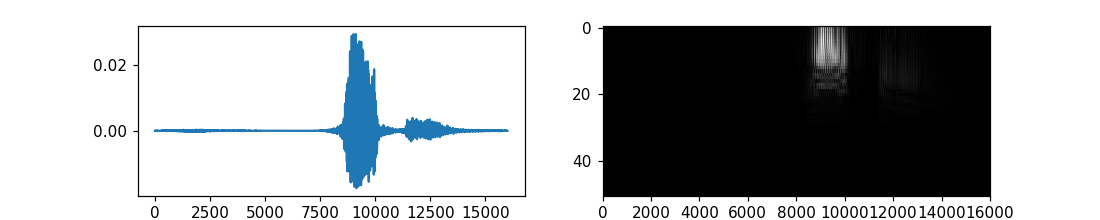

<IPython.core.display.Javascript object>


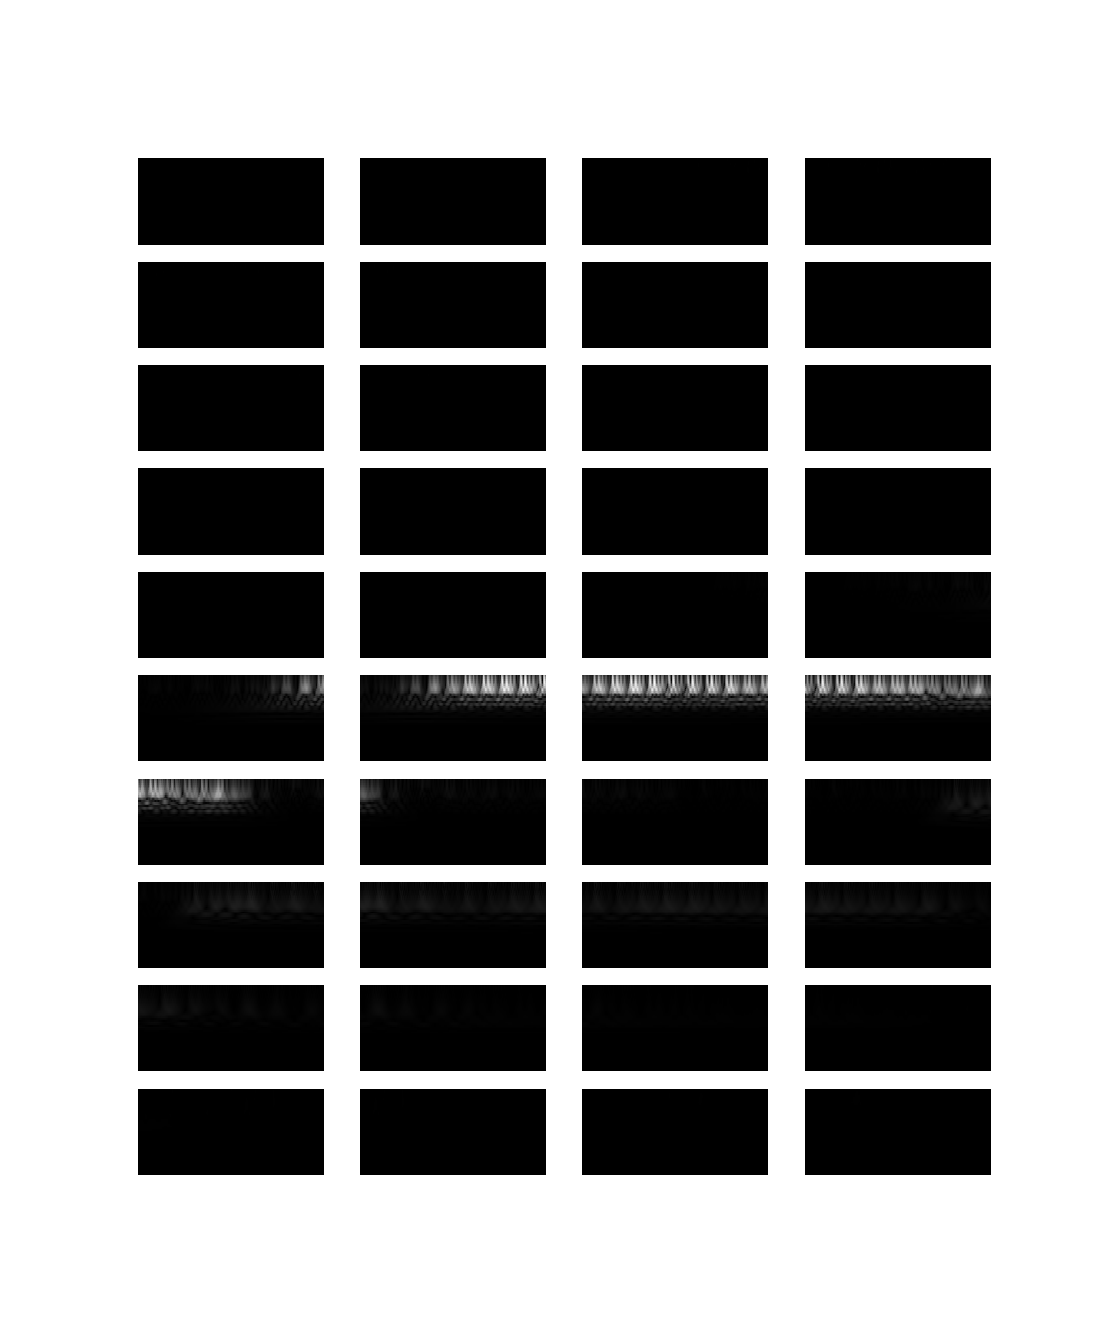

/home/bo/mydev/tsrc2017/input/train/audio/happy/a8cb6dda_nohash_1.wav


<IPython.core.display.Javascript object>


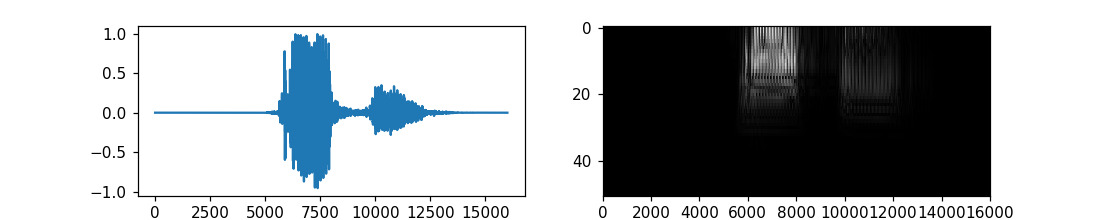

<IPython.core.display.Javascript object>


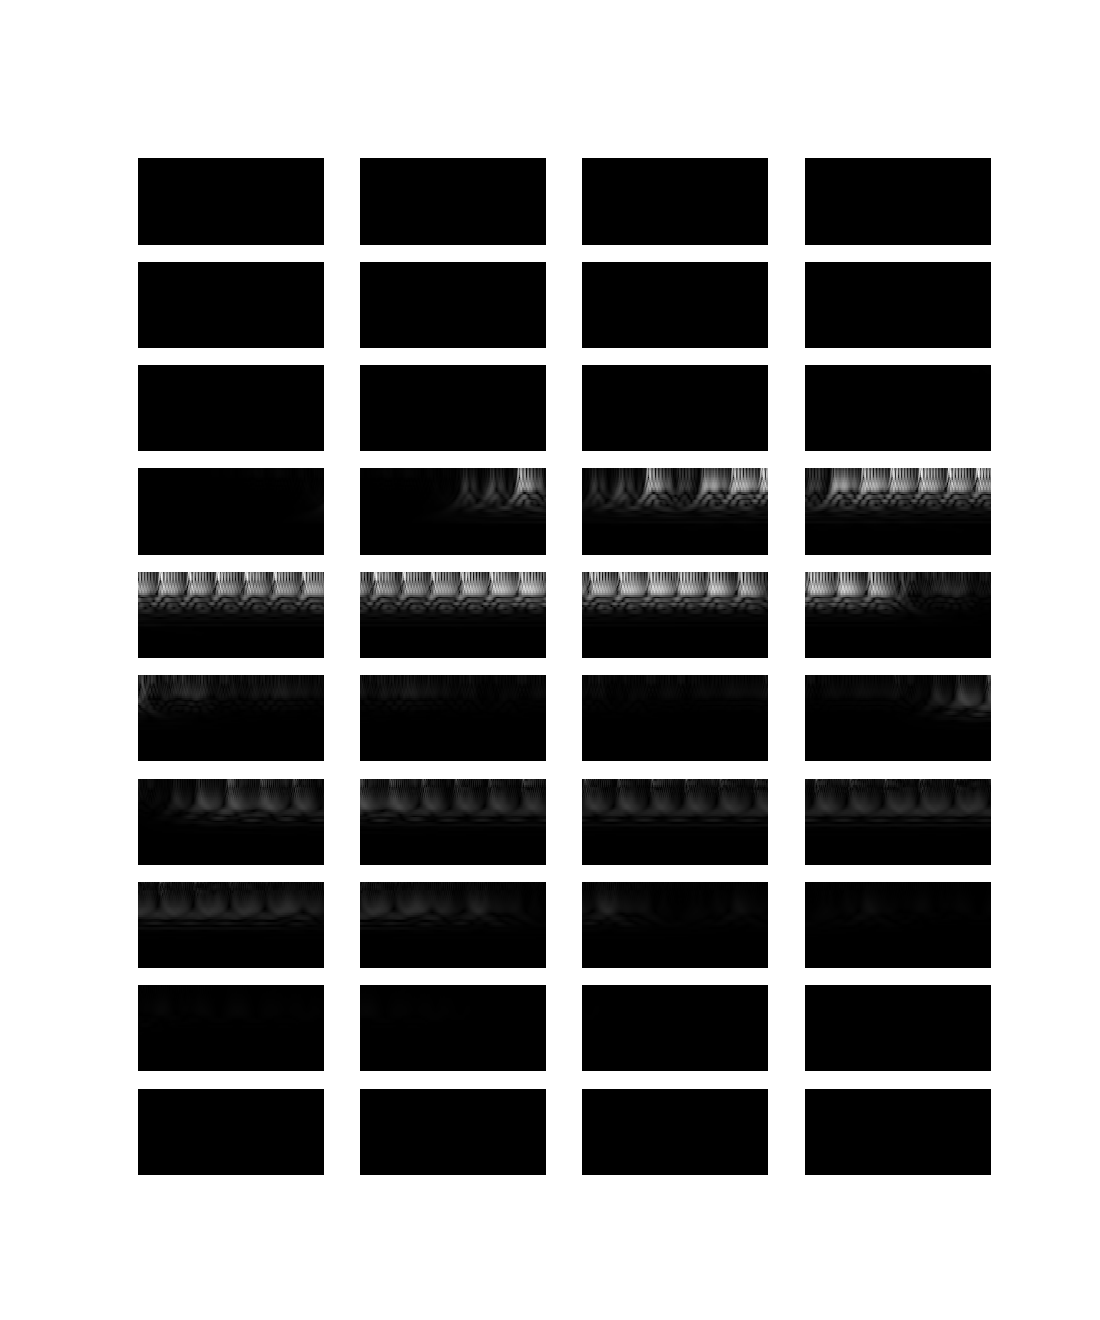

/home/bo/mydev/tsrc2017/input/train/audio/happy/88e90bc1_nohash_1.wav


<IPython.core.display.Javascript object>


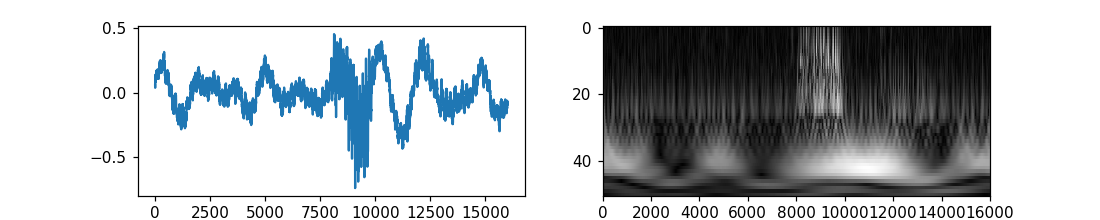

<IPython.core.display.Javascript object>


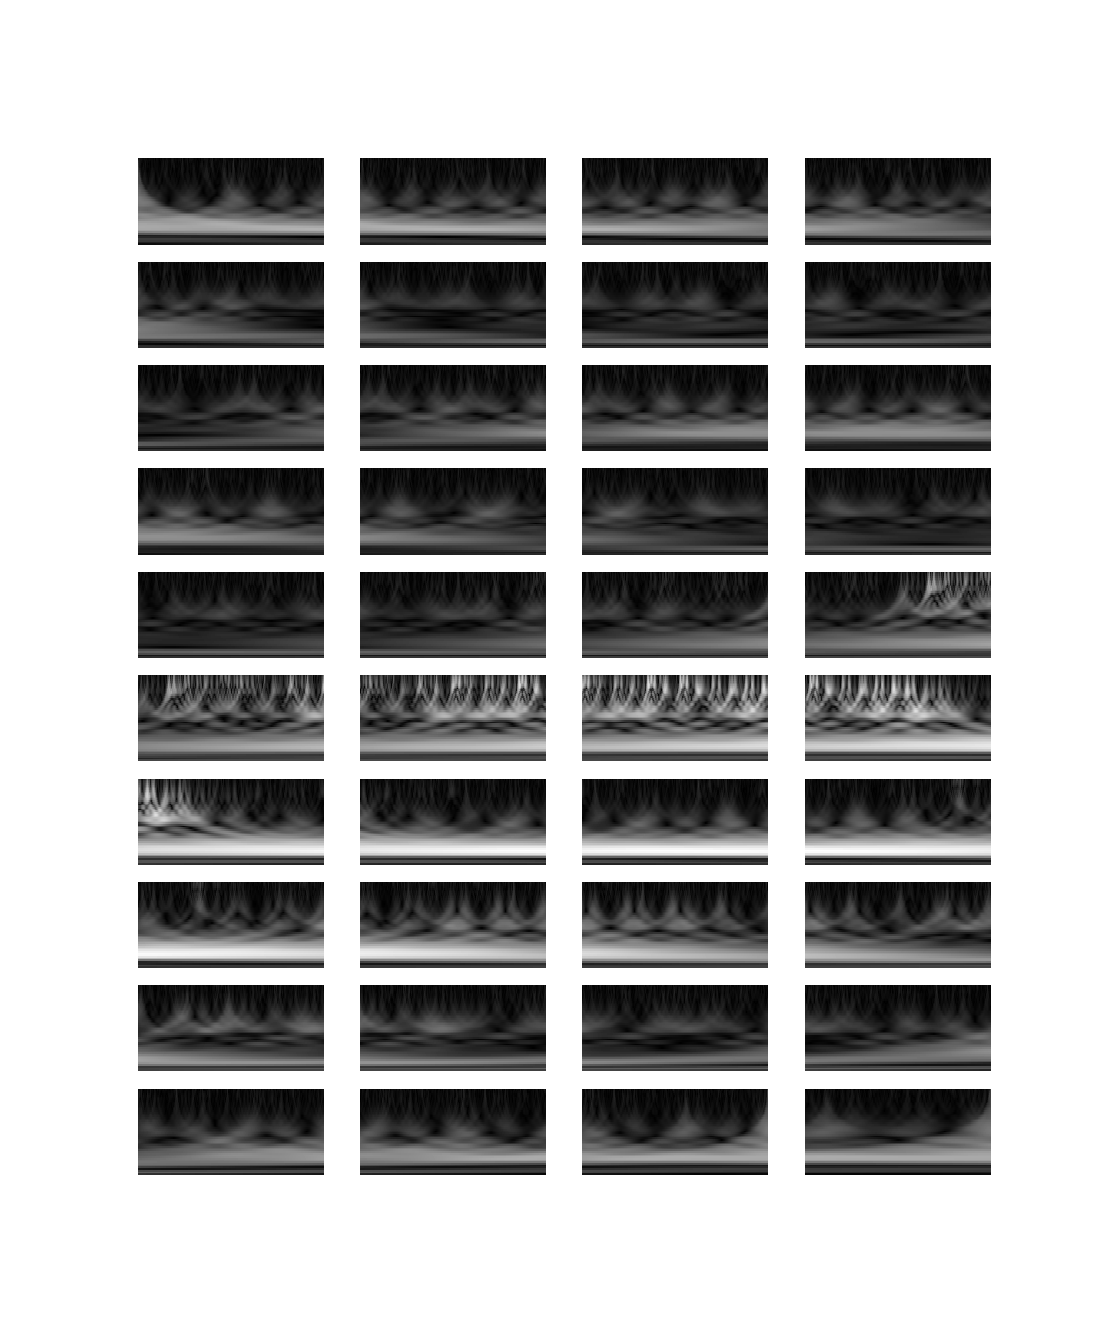

/home/bo/mydev/tsrc2017/input/train/audio/happy/49f30eed_nohash_0.wav


<IPython.core.display.Javascript object>


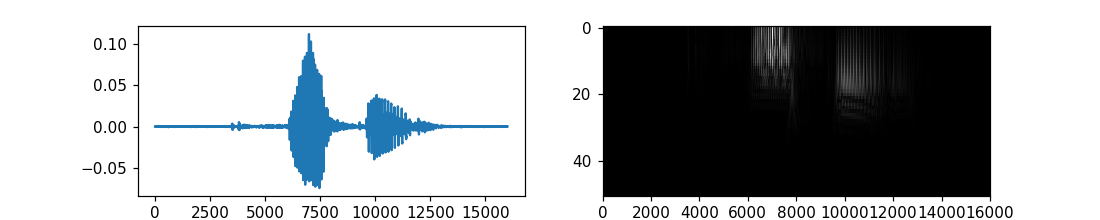

<IPython.core.display.Javascript object>


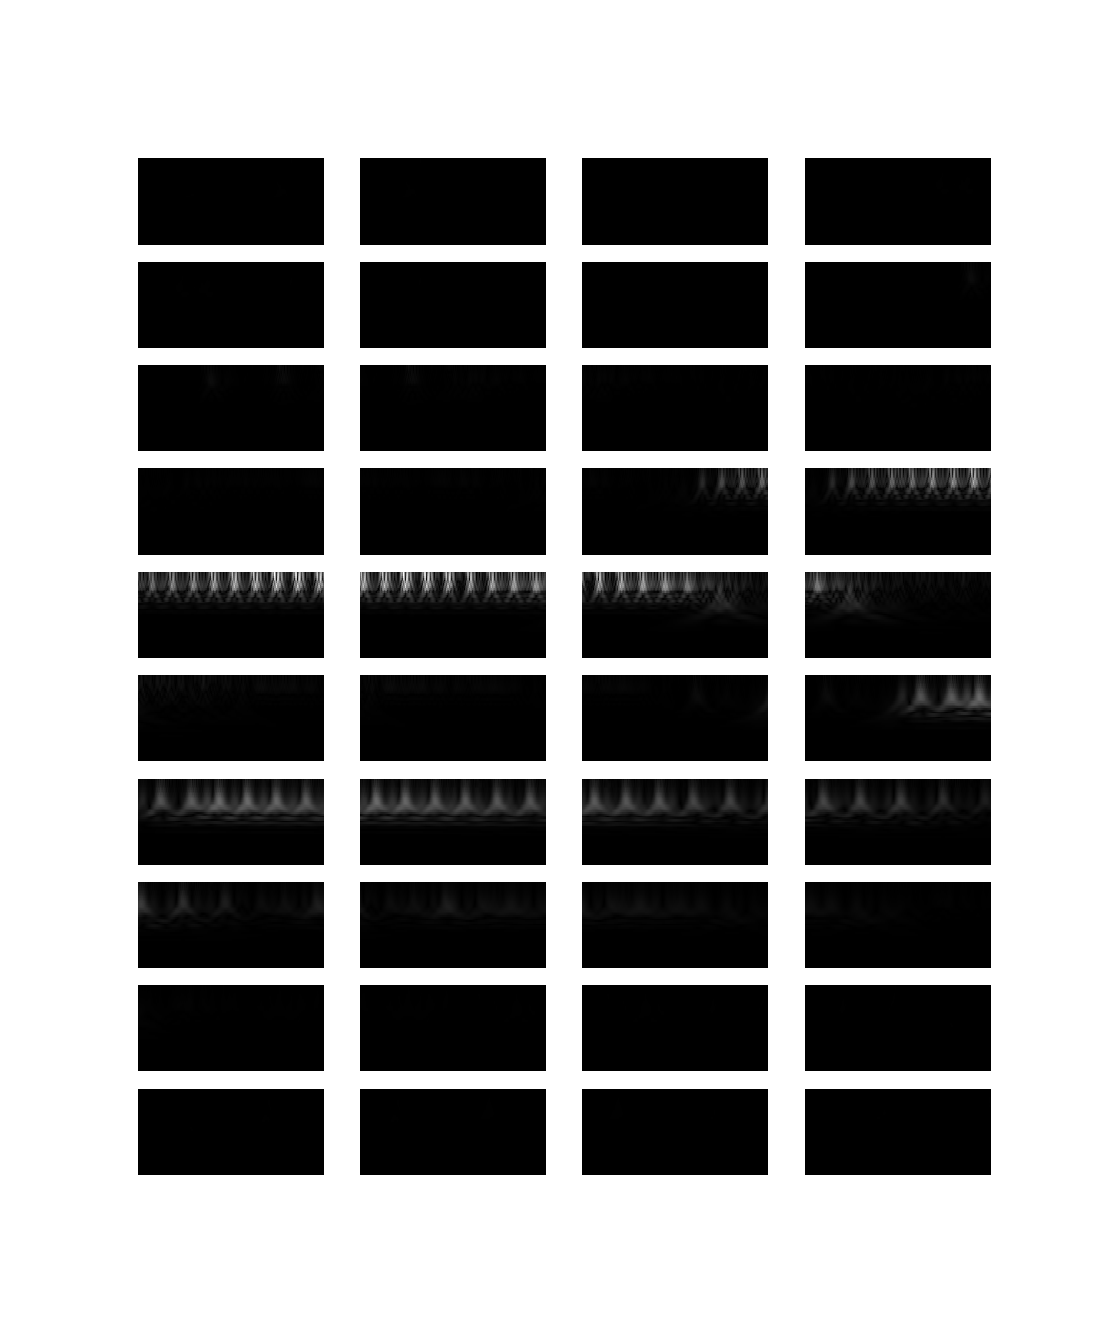

/home/bo/mydev/tsrc2017/input/train/audio/happy/54d9ccb5_nohash_0.wav


<IPython.core.display.Javascript object>


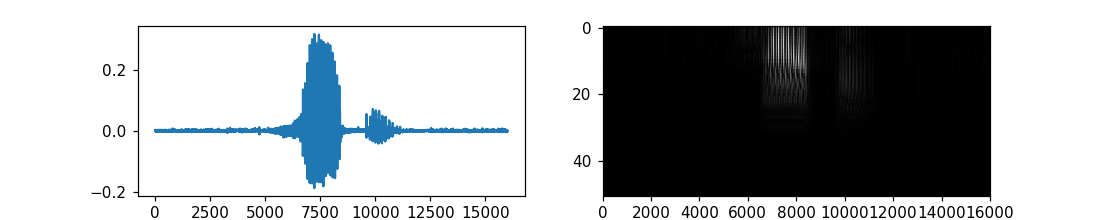

<IPython.core.display.Javascript object>


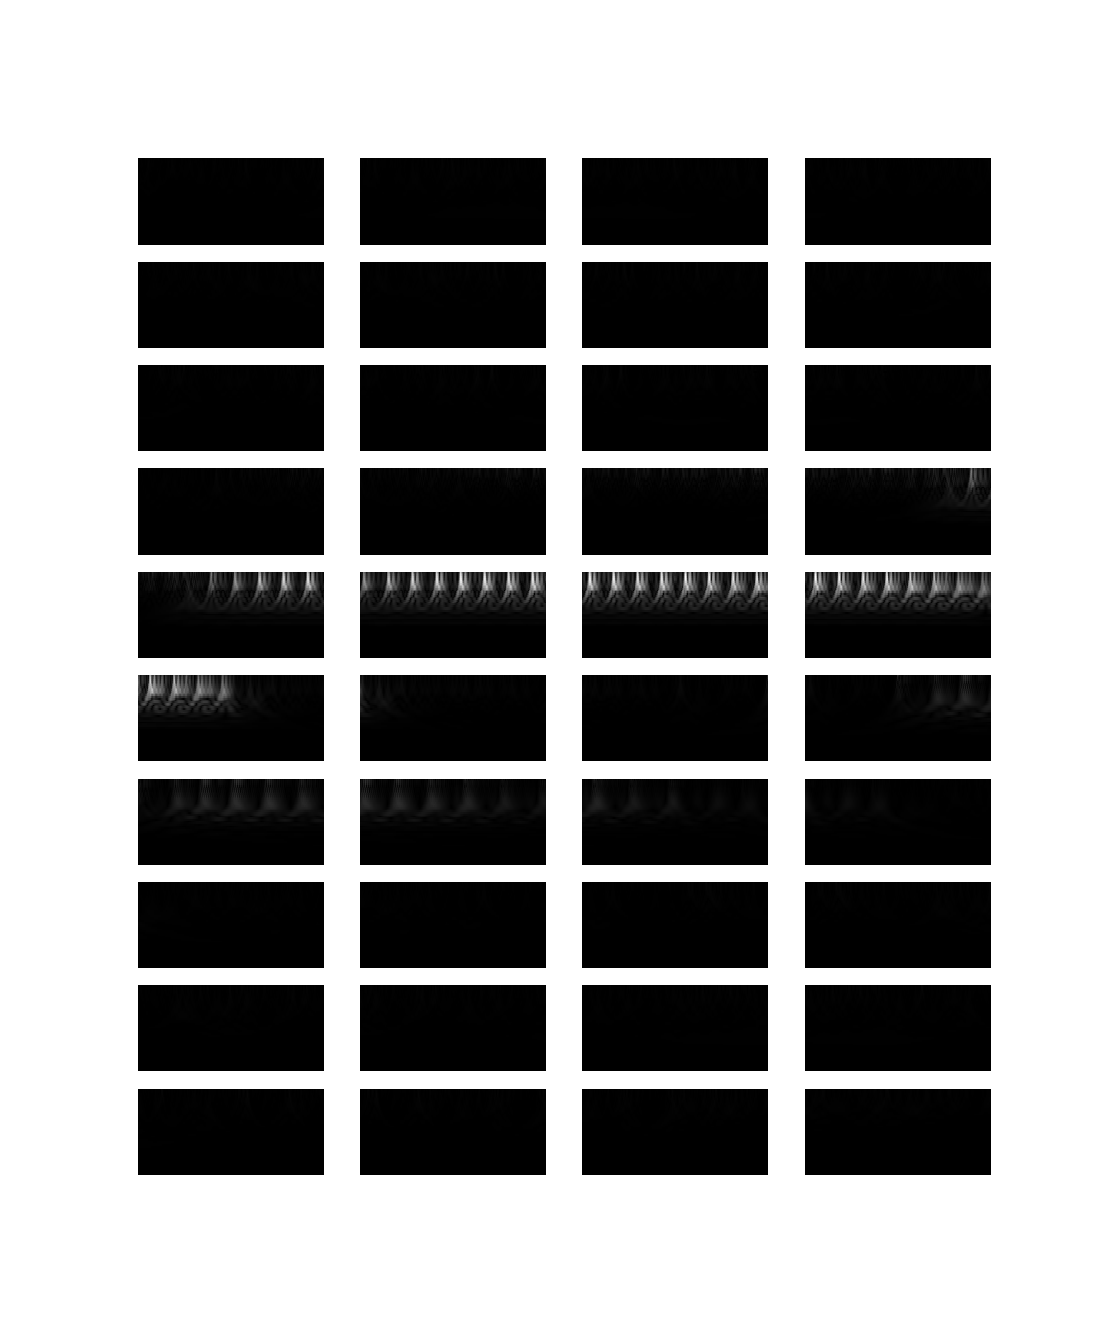

/home/bo/mydev/tsrc2017/input/train/audio/happy/cab100c9_nohash_1.wav


<IPython.core.display.Javascript object>


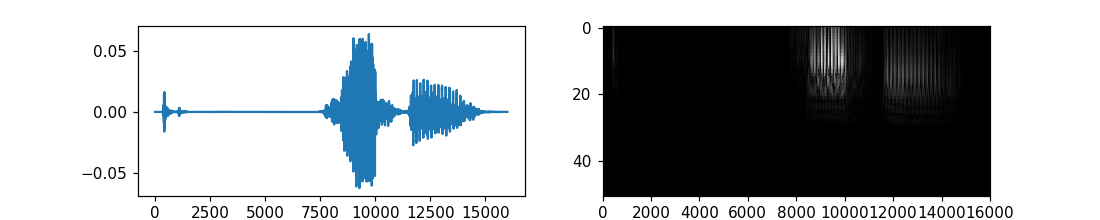

<IPython.core.display.Javascript object>


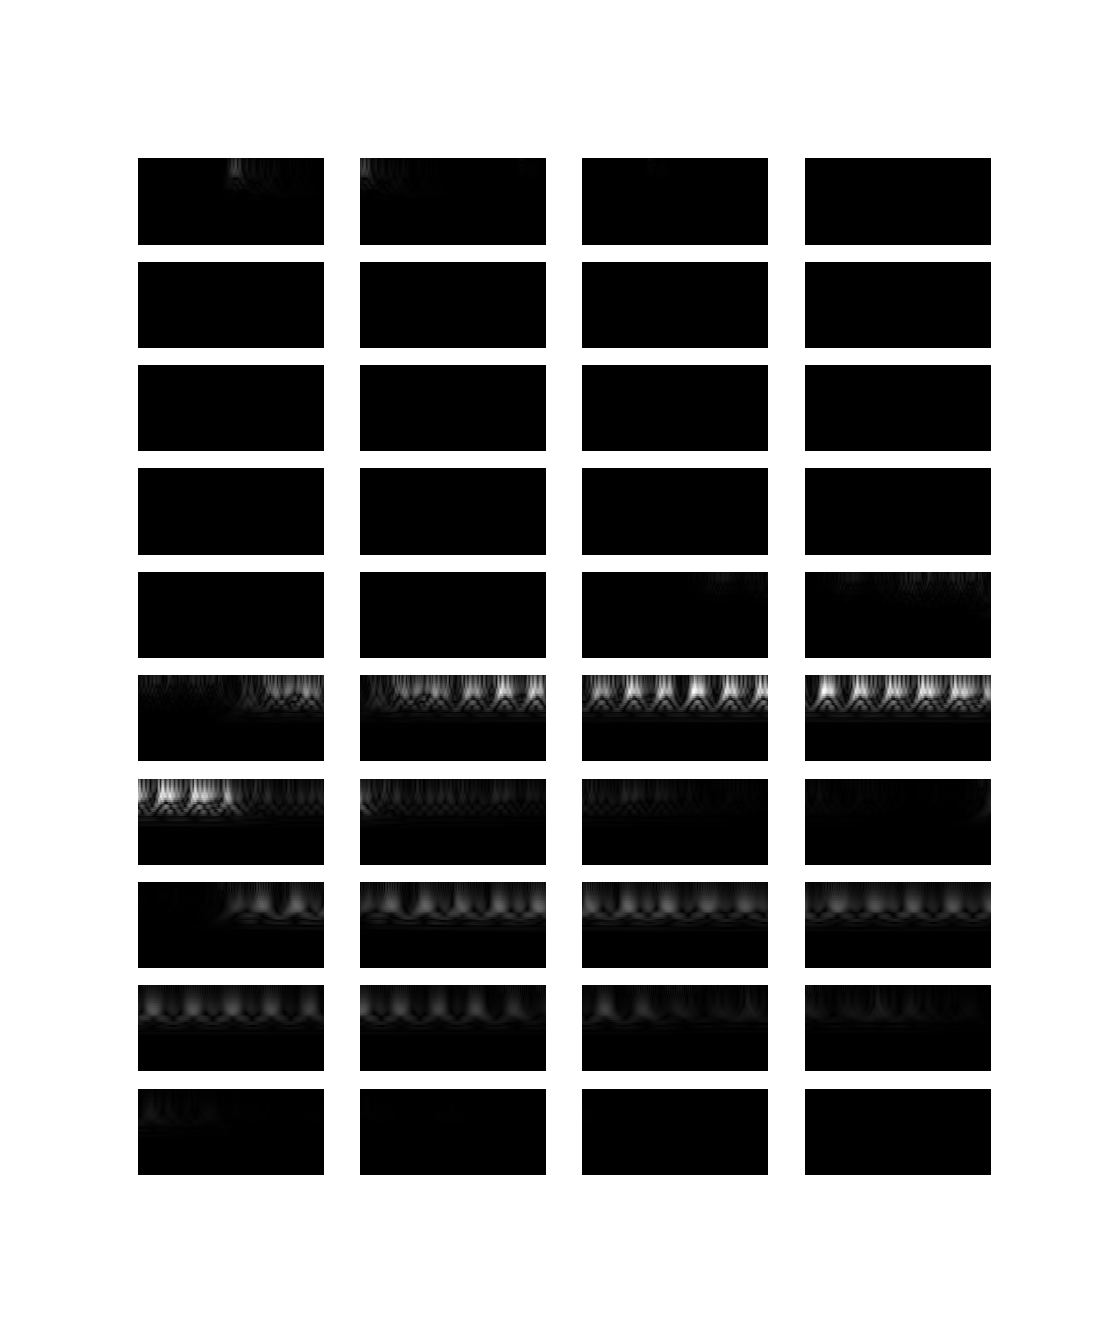

/home/bo/mydev/tsrc2017/input/train/audio/happy/71904de3_nohash_2.wav


<IPython.core.display.Javascript object>


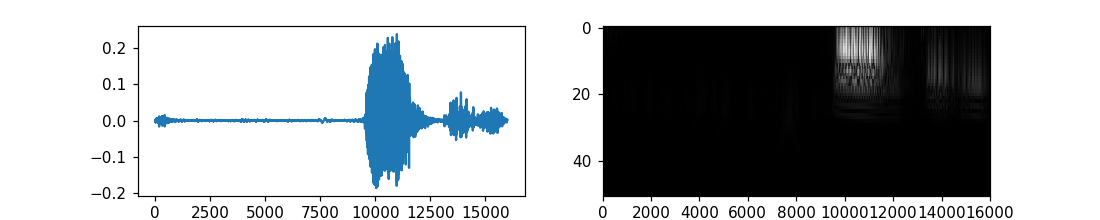

<IPython.core.display.Javascript object>


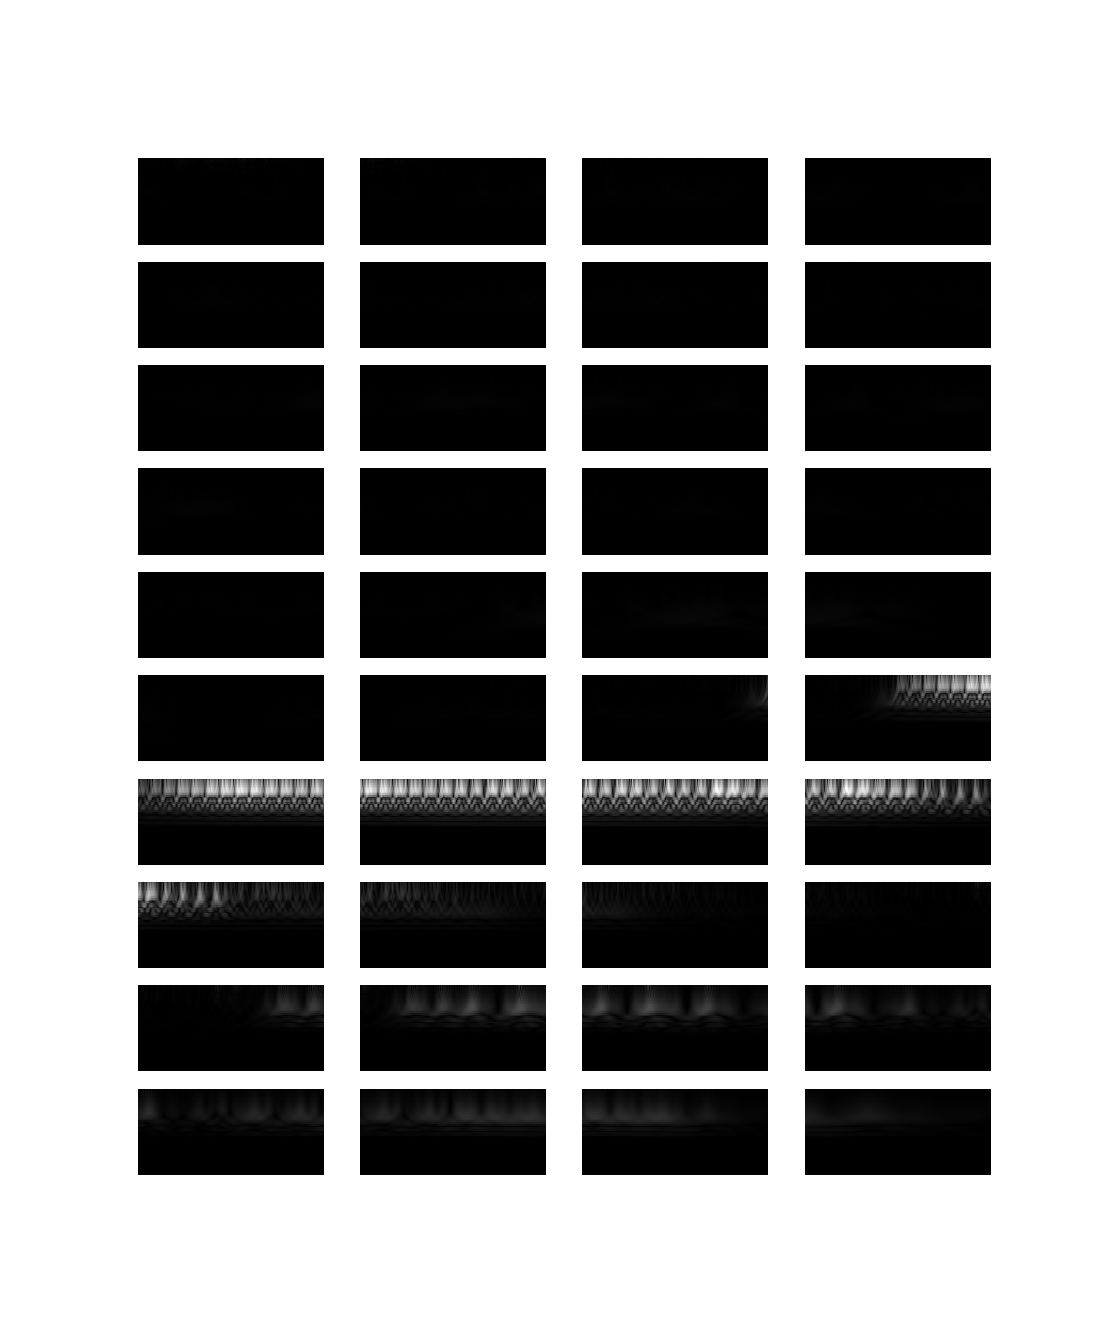

/home/bo/mydev/tsrc2017/input/train/audio/happy/1746d7b6_nohash_0.wav


<IPython.core.display.Javascript object>


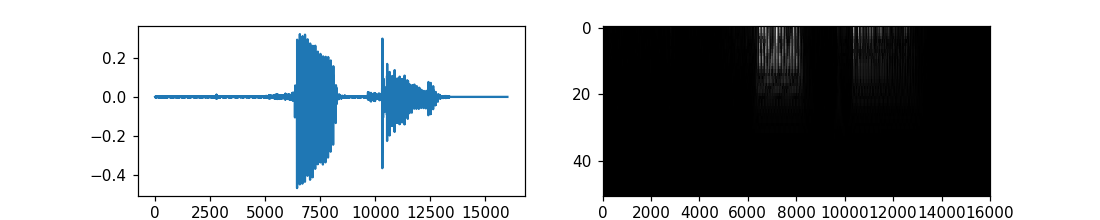

<IPython.core.display.Javascript object>


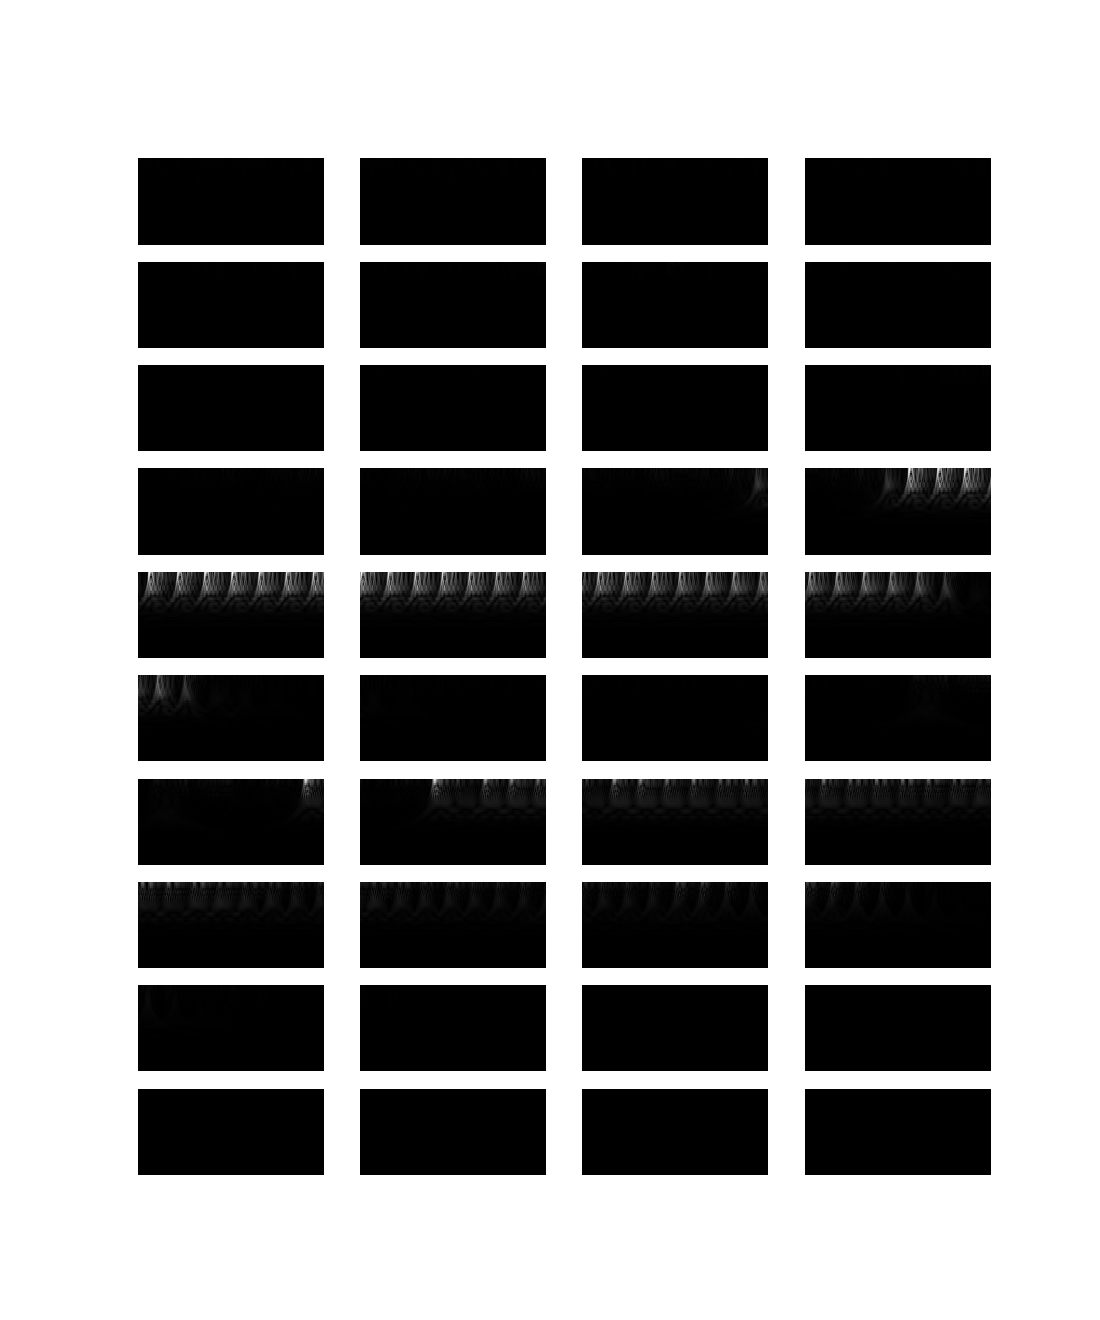

/home/bo/mydev/tsrc2017/input/train/audio/happy/3d6bee47_nohash_0.wav


<IPython.core.display.Javascript object>


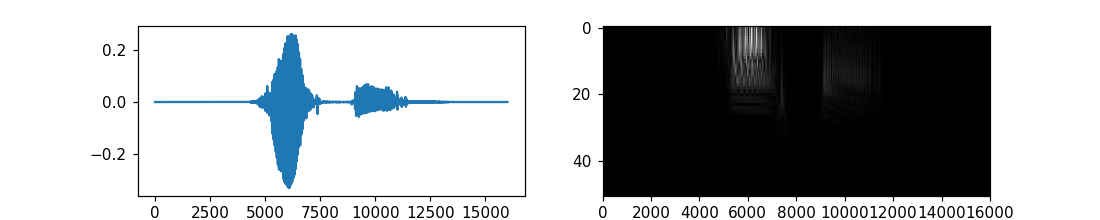

<IPython.core.display.Javascript object>


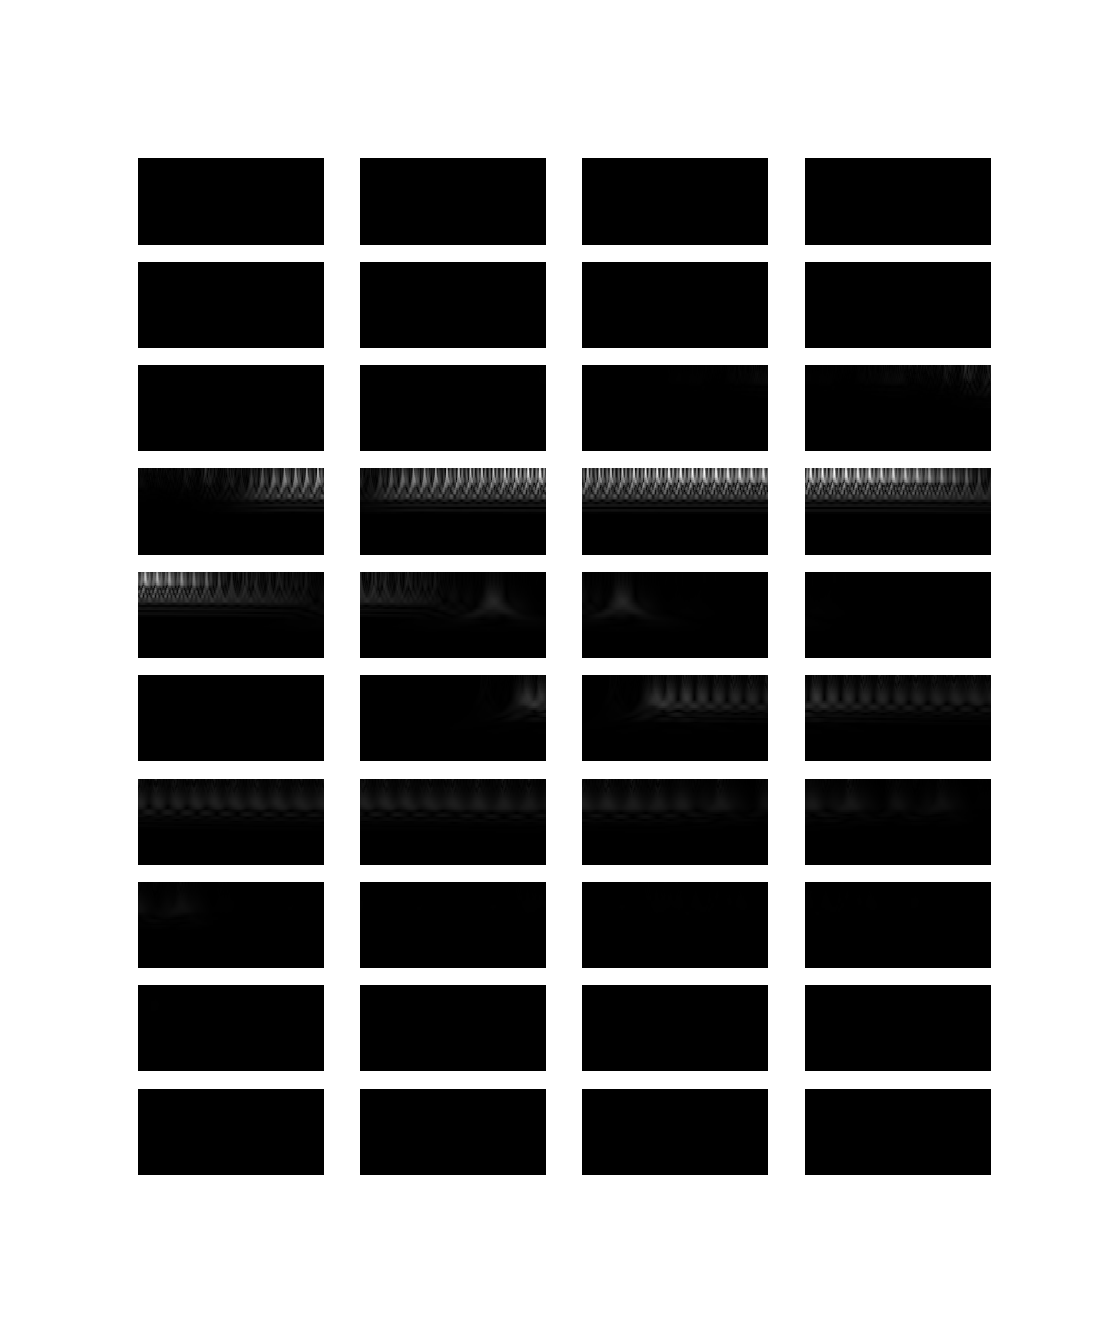

/home/bo/mydev/tsrc2017/input/train/audio/happy/da4ef063_nohash_0.wav


<IPython.core.display.Javascript object>


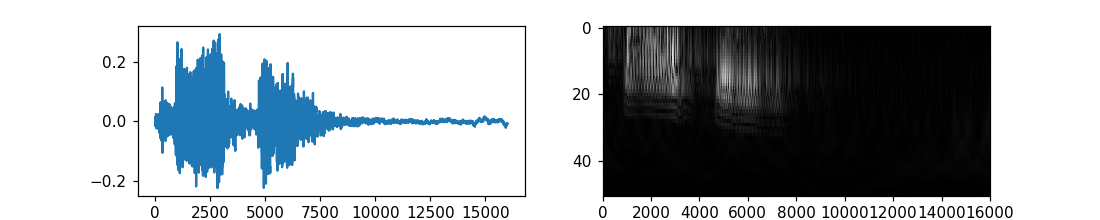

<IPython.core.display.Javascript object>


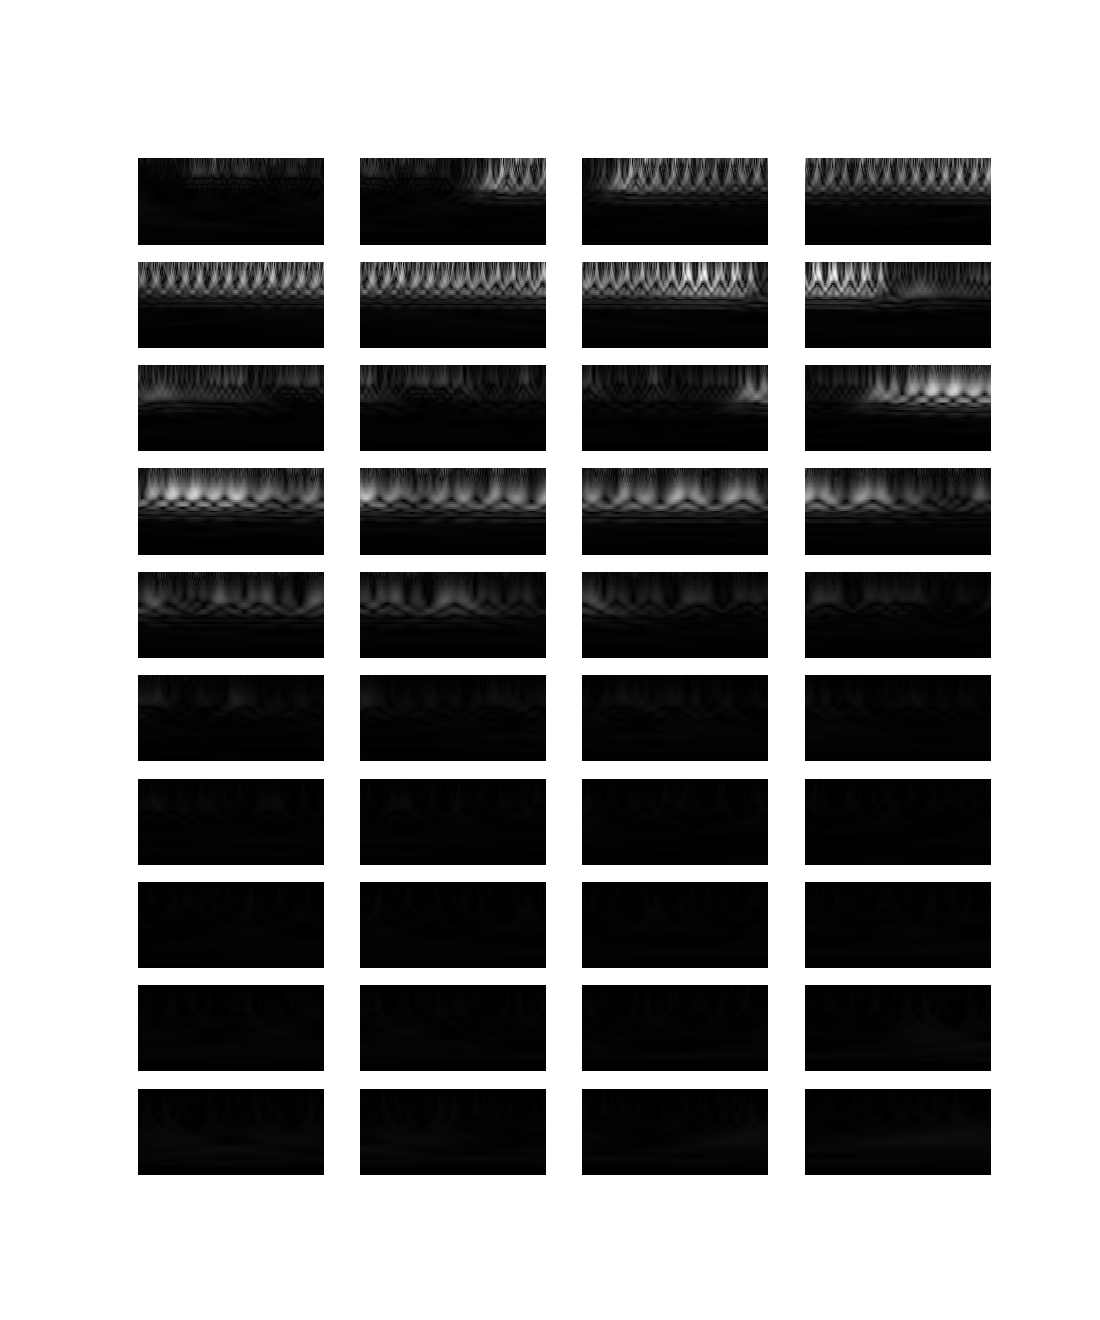

In [66]:
for filename in filenames[:10]:
    print filename
    run(filename,N=3,gamma=3,beta=1)